## 부스팅(Boosting)

  부스팅은 잘못 분류된 객체들에 집중하여 새로운 분류 규칙을 생성하는 단계를 반복하는 순차적 학습 알고리즘이다.

  - 부스팅은 여러개의 분류기가 순차적으로 학습(병렬로 학습은 불가능함)

  - 이전 학습시 예측이 틀린 데이터에 대해서 올바르게 예측할 수 있도록 다음 분류기에서는 틀린 데이터에 더 큰 가중치를 부여해서 표본 추출 후, 학습과 예측을 수행




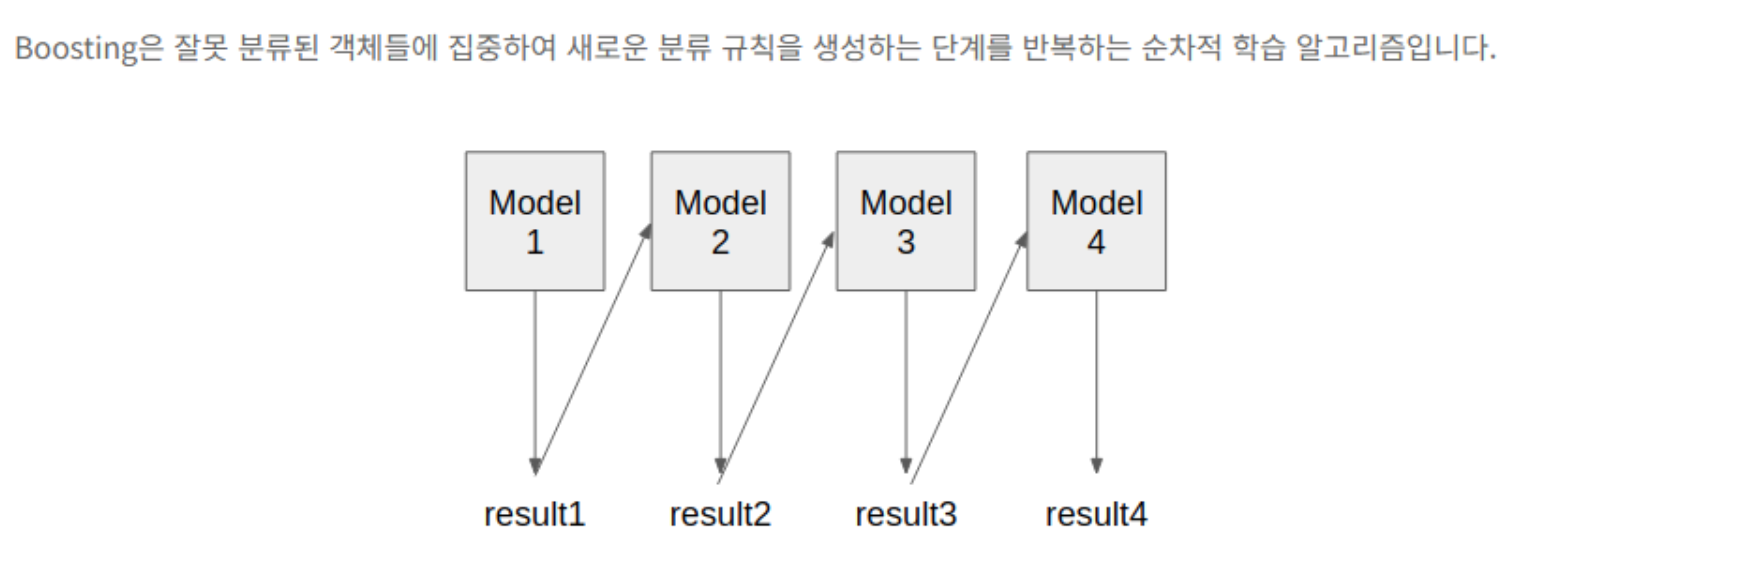

# AdaBoost Classifier


Ada boost는 boosting 알고리즘이므로 오분류된 샘플들을 찾아 다음 분류기가 이를 집중적으로 학습할 수 있도록 하는 거이다. 약한 학습기(weak learner)들을 적절하게 결합하여 강한 학습기(strong learner)를 구성하며, 훈련 오류율(error rate)를 이용해 샘플의 가중치를 설정한다.

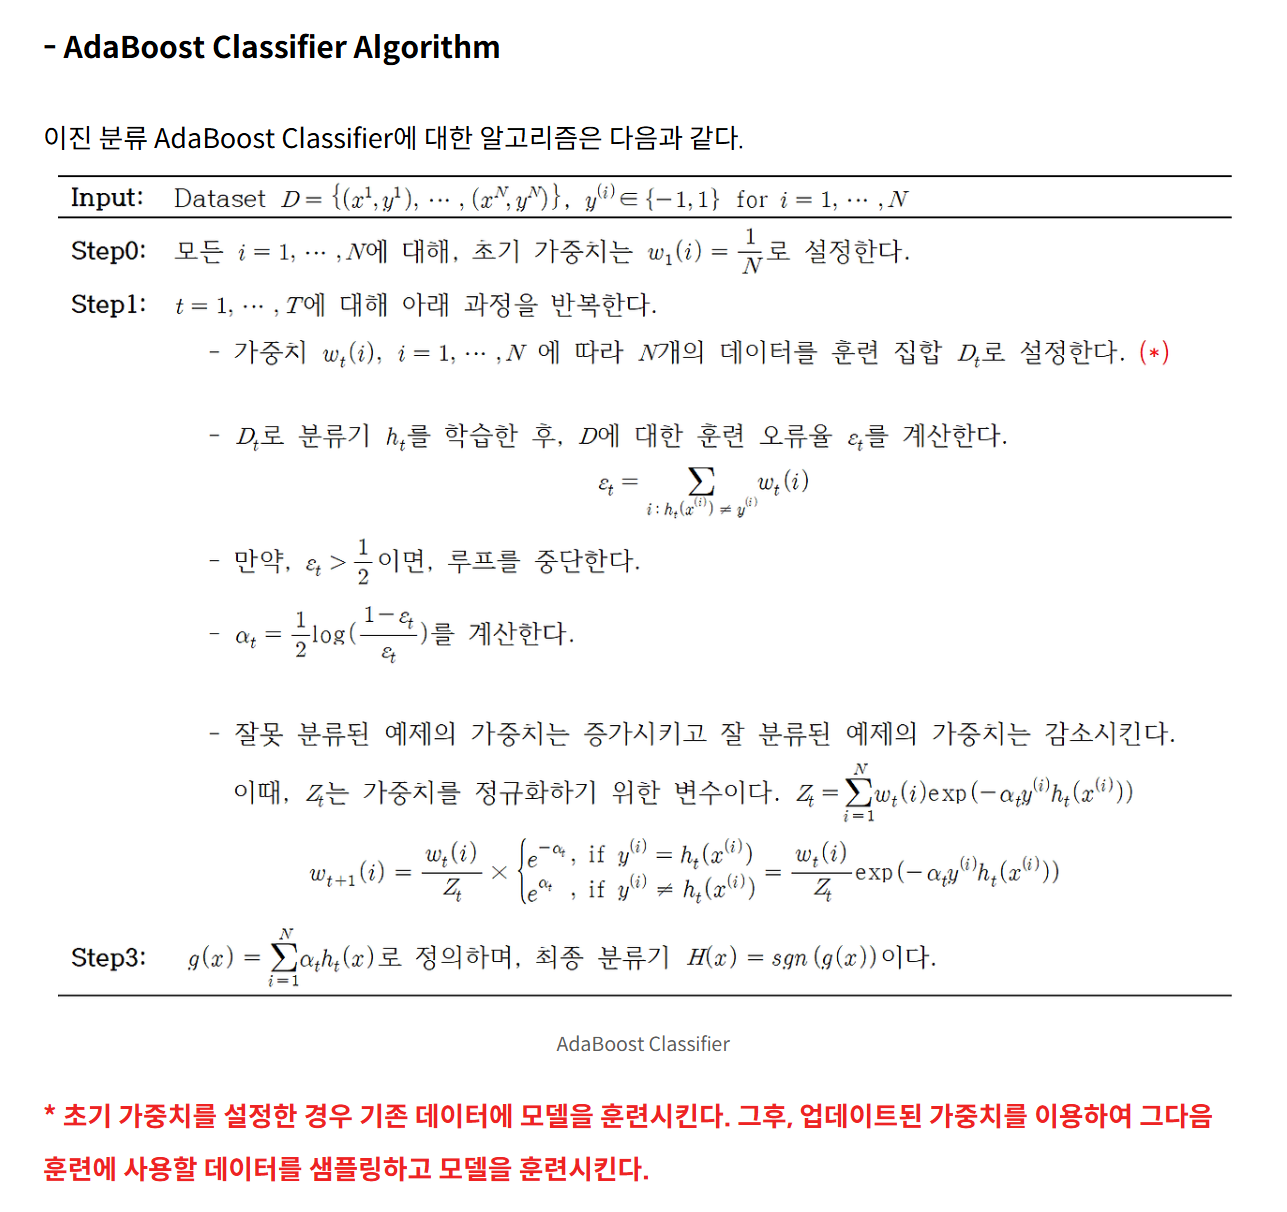

- AdaBoost의 특징

  Bagging의 대표적인 알고리즘인 Random Forest는 분류기들이 모두 동일한 영향력을 지니지만, AdaBoost는 상대적으로 더 영향력 (* at는 영향력을 나타냄)이 큰 분류기들이 존재하며, 이에 따라 분류를 진행한다.


- 예제

 h1(i) 분류기를 학습시키는 샘플링 데이터는 훈련에 사용한 것이고, 분류기가 예측한 값은 따로 있다.

 나와있는 표에서 yi의 값과 h(i)의 값이 틀리다는 것을 확인해야한다. 그리고 각 스텝마다 그 값들의 가중치를 더해주거나 빼주고 있다는 것을 알아야 한다.

  출처: https://footprints-toward-data-analysis.tistory.com/11

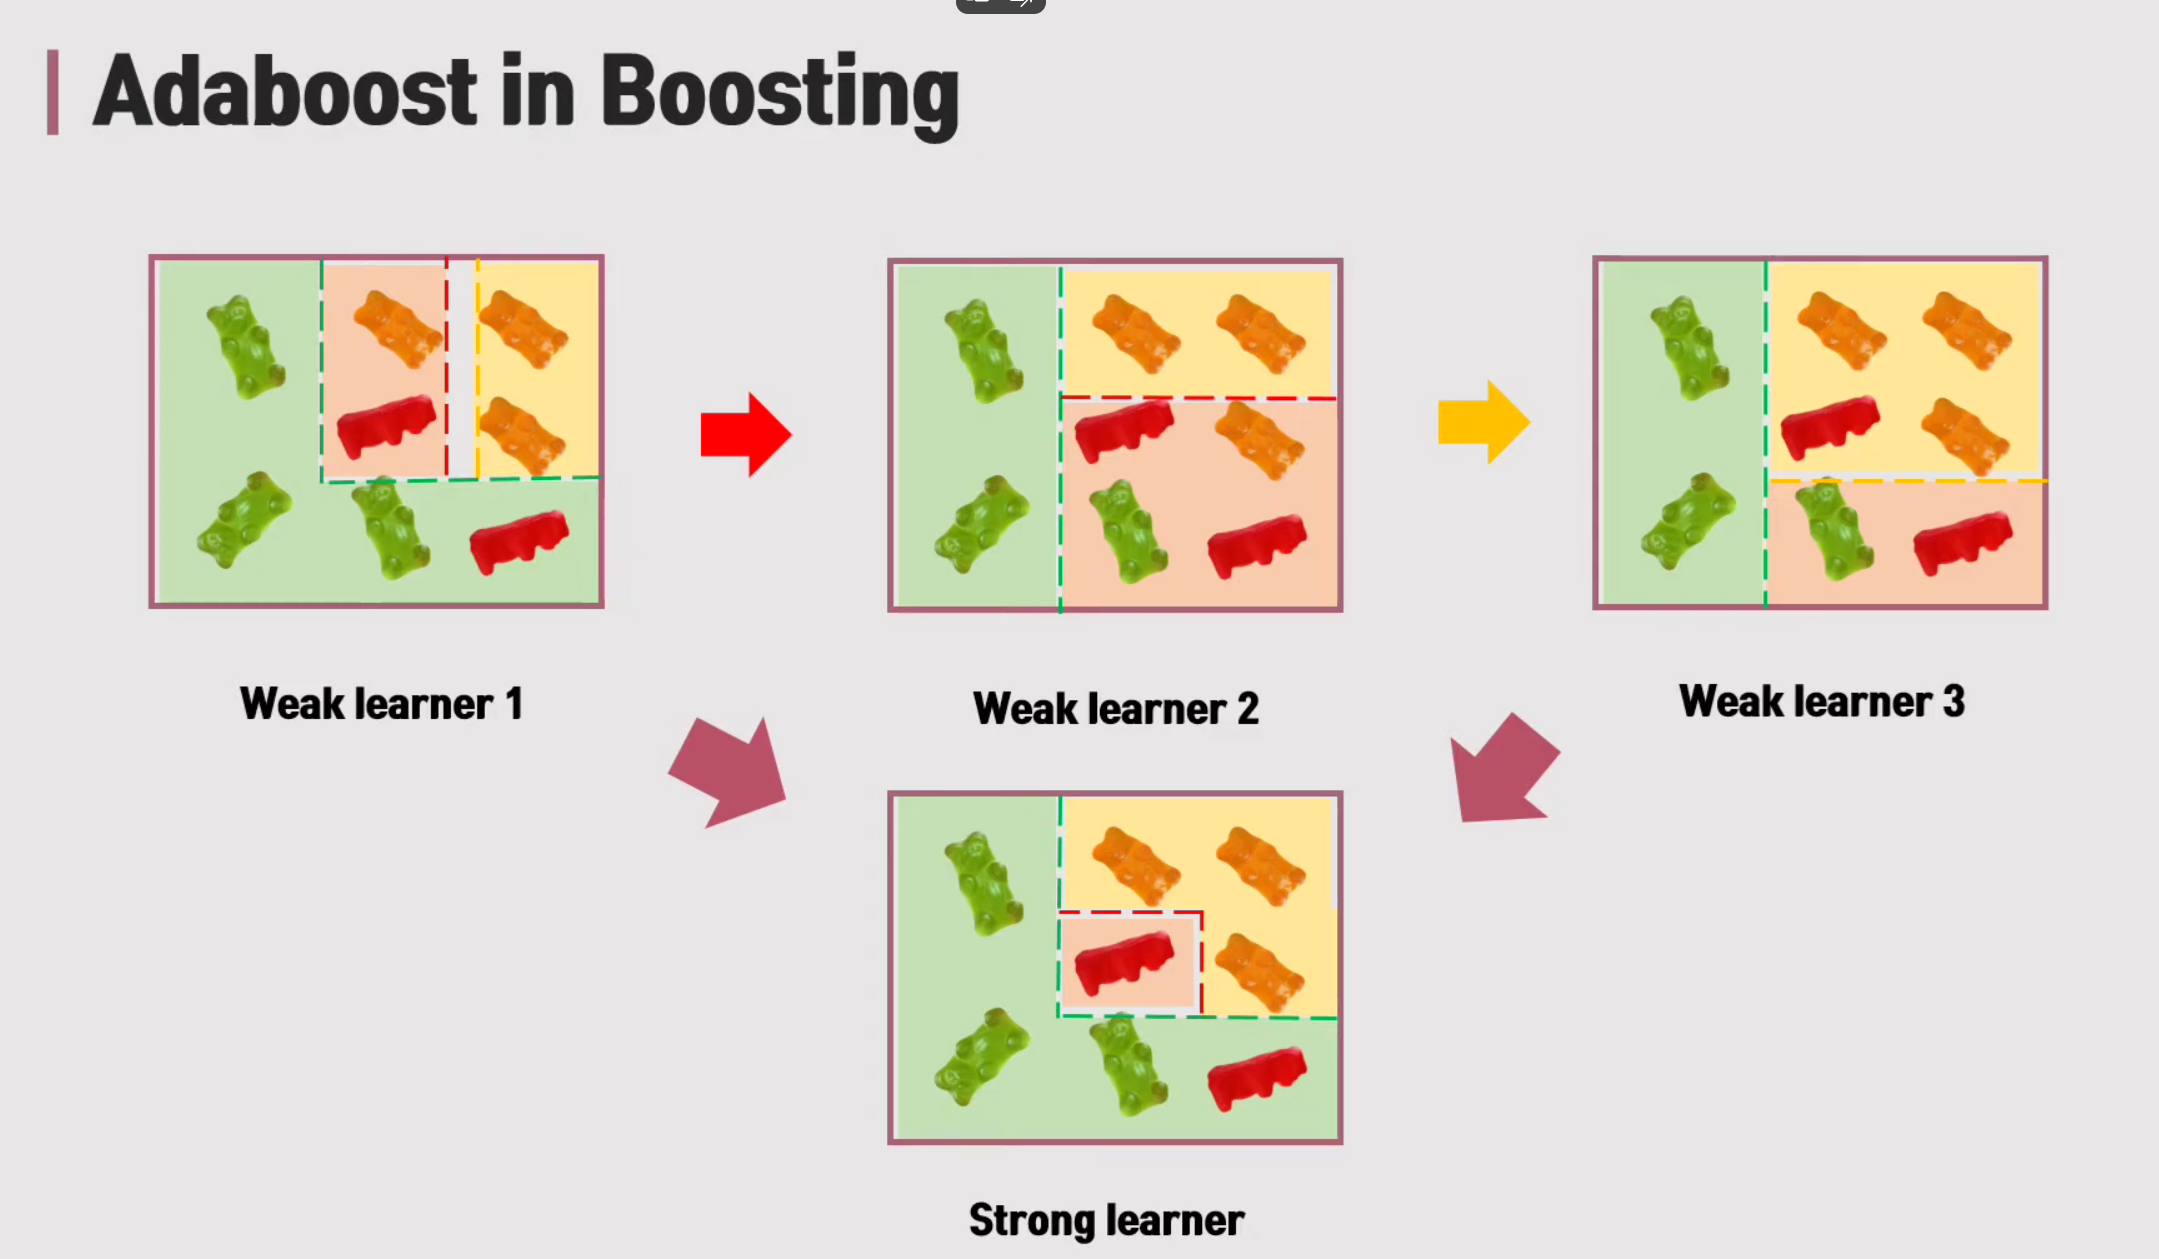

### - 그림으로 이해하기

  - weak learner 1은 초록색 젤리에 대한 정확도가 치우쳐져 있다. 반면, 빨간색 젤리의 정확도가 50프로 밖에 되지 않는다. 빨간색 젤리의 정화도를 올리기 위해  weak learner 2가 생성된다.

  - weak learner 2는 빨간색 젤리에 대한 정확도가 치우쳐져 있다. 반면, 주황색 젤리의 정확도가 66.6프로 밖에 되지 않는다. 주황색 젤리의 정화도를 올리기 위해  weak learner 3가 생성된다.

  - week 1,2,3를 통한 decision boundary를 잘 조합해서 나오는 learner가 Strong Learner이다.

  

### -  실습

In [ ]:
from sklearn.datasets import load_iris
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# 데이터 로드
iris = load_iris()
X = iris.data
y = iris.target

# 데이터를 학습용과 테스트용으로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 에이다부스트 모델 생성
clf = AdaBoostClassifier()

# 모델 학습
clf.fit(X_train, y_train)

# 예측
y_pred = clf.predict(X_test)

# 성능 평가
print("Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred) * 100))


Accuracy: 100.00%
